In [1]:
# BASELINE RANDOM FOREST MODEL
import numpy as np
import pandas as pd
from __future__ import division
%matplotlib inline 
import matplotlib.pyplot as plt

/home/q/anaconda/envs/experimental/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
all_data = pd.DataFrame.from_csv('../../finalData/DataPriorToModels.csv')

In [3]:
all_data = all_data.drop(['restaurant_id', 'prior_date', 'open'],1,errors='ignore')

In [4]:
all_data = all_data.dropna(axis=1)

In [5]:
all_data.shape

(27088, 7097)

In [6]:
#include = [col for col in all_data.columns if col not in ['vio1', 'vio2', 'vio3']]

train_X = all_data[all_data['year'] < 2014]
test_X = all_data[all_data['year'] >= 2014]

In [7]:
train_y = train_X['vio3']
test_y = test_X['vio3']

In [8]:
train_X = train_X.drop(['vio1', 'vio2', 'vio3'],axis=1, errors='ignore')
test_X = test_X.drop(['vio1', 'vio2', 'vio3'],axis=1, errors='ignore')

In [9]:
train_X = train_X.drop(['date'],1)
test_X = test_X.drop(['date'],1)

In [10]:
train_X = train_X.drop(train_X.columns[0],axis=1)
train_X.shape

(23597, 7092)

In [11]:
test_X = test_X.drop(test_X.columns[0], axis=1)
test_X.shape

(3491, 7092)

In [12]:
# create dummy var for severe violations (y3)
train_y_dum = train_y.map(lambda x: x>=1 and 1 or 0)
test_y_dum = test_y.map(lambda x: x>=1 and 1 or 0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
fit = []
my_mod = (RandomForestClassifier(
            n_estimators = 500,
            n_jobs = 6)
                   )

my_mod.fit(train_X,train_y_dum)
fit.append(my_mod)

preds = my_mod.predict(test_X)

In [15]:
sum(preds == test_y_dum)/len(test_y_dum)

0.64909767974792321

In [16]:
imp = my_mod.feature_importances_

In [17]:
importances = my_mod.feature_importances_
std = np.std([tree.feature_importances_ for tree in my_mod.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[0:200]

# Print the feature ranking
print("Feature ranking:")

for f in range(30):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5003 (0.093413)
2. feature 5004 (0.038363)
3. feature 5240 (0.030936)
4. feature 5000 (0.028583)
5. feature 5001 (0.023574)
6. feature 5239 (0.021179)
7. feature 5020 (0.009594)
8. feature 5019 (0.009387)
9. feature 5021 (0.008717)
10. feature 5010 (0.008140)
11. feature 5009 (0.008097)
12. feature 5002 (0.007826)
13. feature 5022 (0.004739)
14. feature 5044 (0.003047)
15. feature 5054 (0.002976)
16. feature 5033 (0.002956)
17. feature 5053 (0.002815)
18. feature 5030 (0.002717)
19. feature 5025 (0.002666)
20. feature 5074 (0.002435)
21. feature 5039 (0.002389)
22. feature 5042 (0.002301)
23. feature 5052 (0.002287)
24. feature 5051 (0.002237)
25. feature 5072 (0.002235)
26. feature 5038 (0.002206)
27. feature 5040 (0.002182)
28. feature 5028 (0.002148)
29. feature 5066 (0.002109)
30. feature 5055 (0.002049)


In [18]:
for i in train_X.columns[indices]:
    print i

vio3_lag
time_btw_insps
month
NA
vio1_lag
year
longitude
latitude
review_count
reviews_mean_filter
reviews_mean
vio2_lag
stars
Noise Level
Wi-Fi
Delivery
Wheelchair Accessible
Caters
Alcohol
lunch
Good For Kids
Has TV
Waiter Service
Takes Reservations
dinner
Good For Groups
Good for Kids
BYOB/Corkage
street
casual
Outdoor Seating
reviews_count
latenight
food_text
good_text
place_text
reviews_count_filter
Take-out
Music
breakfast
reviews_pos_count_filter
reviews_pos_count
Accepts Credit Cards
like_text
Sandwiches
BYOB
Pizza
great_text
reviews_sd_filter
just_text
Chinese
garage
Corkage
Order at Counter
reviews_sd
really_text
lot
love_text
divey
Attire
service_text
time_text
don_text
boston_text
ve_text
Italian
Coffee & Tea
dessert
brunch
best_text
Food
chicken_text
Dogs Allowed
nice_text
staff_text
pretty_text
people_text
order_text
come_text
Happy Hour
Drive-Thru
American (Traditional)
Restaurants
little_text
better_text
got_text
lunch_text
Japanese
Smoking
friendly_text
classy
way_text

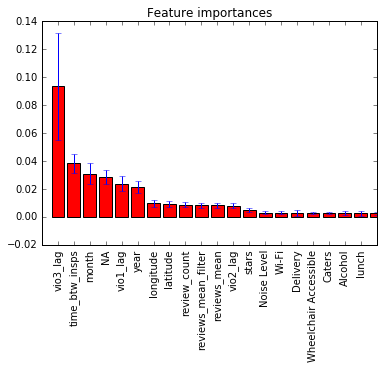

In [51]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(20), train_X.columns[indices], rotation=90)
plt.xlim([-1, 20])
plt.show()

In [20]:
train_X_sub = train_X[indices]
train_X_sub.shape

(23597, 200)

In [21]:
test_X_sub = test_X[indices]
test_X_sub.shape

(3491, 200)

In [22]:
# save 200-feature datasets to file
train_X_sub.to_csv('../../finalData/train_sub200.csv')
test_X_sub.to_csv('../../finalData/test_sub200.csv')

In [23]:
train_y_dum.to_csv('../../finalData/train_y_dum.csv')
test_y_dum.to_csv('../../finalData/test_y_dum.csv')

In [60]:
train_X_sub_all = pd.concat([train_X_sub, train_y_dum], axis=1)
test_X_sub_all = pd.concat([test_X_sub, test_y_dum], axis = 1)

In [63]:
train_X_sub_all.to_csv('../../finalData/train_sub200_all.csv')
test_X_sub_all.to_csv('../../finalData/test_sub200_all.csv')

In [26]:
rf_mod = (RandomForestClassifier(
            n_estimators = 500,
            n_jobs = 6)
                   )
rf_mod.fit(train_X_sub,train_y_dum)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
preds_rf_probs = rf_mod.predict_proba(test_X_sub)
preds_rf_raw= rf_mod.predict(test_X_sub)


In [38]:
# these metrics are identical to those found at nspectr.org using R.
sum(preds_rf_raw == test_y_dum)/len(test_y_dum)

0.69407046691492413

In [31]:
from sklearn import metrics

In [44]:
# same metrics as the R script for model_baseline.R
metrics.roc_auc_score(y_true = test_y_dum, y_score = preds_rf_probs[:,1])

0.78975691969824147